<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [ ]:
To the assessor:
I have included markdown cell to help navigate through the questions an answers, mpst answers are composed as a result of a graph or a chart, whenre text is required then I have added that too.


In [201]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
#import plotly.express as px
#import plotly.figure_factory as ff
import seaborn as sns
import math 
#import os
#import time
#import ipywidgets as widgets

#### Read the dataset in the csv file from the URL


In [203]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

<div class="alert alert-block alert-warning">
<b>Task 1: </b> Getting to know the data.
</div>

In [204]:
boston_df=pd.read_csv(boston_url)

In [205]:
dataset_variables = {'CRIM - per capita crime rate by town', 
'ZN - proportion of residential land zoned for lots over 25,000 sq.ft.' ,
'INDUS - proportion of non-retail business acres per town.' ,
'CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)', 
'NOX - nitric oxides concentration (parts per 10 million)', 
'RM - average number of rooms per dwelling', 
'AGE - proportion of owner-occupied units built prior to 1940', 
'DIS - weighted distances to five Boston employment centres', 
'RAD - index of accessibility to radial highways', 
'TAX - full-value property-tax rate per $10,000', 
'PTRATIO - pupil-teacher ratio by town', 
'LSTAT - % lower status of the population', 
'MEDV - Median value of owner-occupied homes in $1000s'}
dataset_variables

{'AGE - proportion of owner-occupied units built prior to 1940',
 'CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
 'CRIM - per capita crime rate by town',
 'DIS - weighted distances to five Boston employment centres',
 'INDUS - proportion of non-retail business acres per town.',
 'LSTAT - % lower status of the population',
 'MEDV - Median value of owner-occupied homes in $1000s',
 'NOX - nitric oxides concentration (parts per 10 million)',
 'PTRATIO - pupil-teacher ratio by town',
 'RAD - index of accessibility to radial highways',
 'RM - average number of rooms per dwelling',
 'TAX - full-value property-tax rate per $10,000',
 'ZN - proportion of residential land zoned for lots over 25,000 sq.ft.'}

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<div class="alert alert-block alert-info">
<b>Task 1: Understanding</b> Getting to know the data.
</div>

In [206]:
#boston_df.tail(20)
boston_df.head(20)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [207]:
#number of rows / number of columns
boston_df.shape

(506, 14)

In [208]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [209]:
len(boston_df)

506

In [210]:
#list of columns:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [211]:
boston_df.describe

<bound method NDFrame.describe of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

     

In [212]:
#Box plot of all values in all columns:

<div class="alert alert-block alert-info">
<b>Task 2:</b> Generate Descriptive Statistics and Visualizations.
</div>

<div class="alert alert-block alert-warning">
<b>Task 2a:</b> For the "Median value of owner-occupied homes" provide a boxplot(specifically for MEDV - Median value of owner-occupied).
</div>

In [213]:
boston_df.boxplot(grid=False)

<AxesSubplot:>

<ipython-input-214-59c707c10f97>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  median=medians[i]


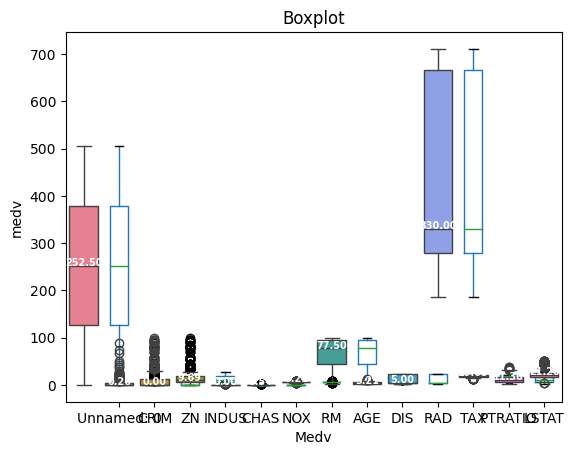

In [214]:
ax = sns.boxplot(data=boston_df)
medians = boston_df.median()

for i in range(len(medians)):
    median=medians[i]
    ax.text(i, median, f'{median:.2f}',horizontalalignment='center', size='x-small', color='w', weight='semibold')

plt.title('Boxplot')
plt.xlabel('Medv')
plt.ylabel('medv')

plt.show()

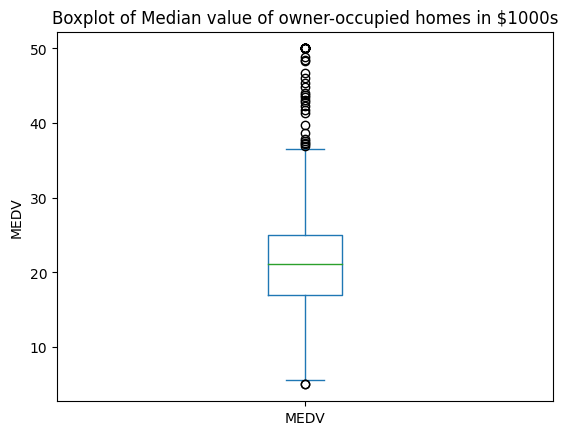

In [215]:
boston_df['MEDV'].plot(kind='box')

plt.title('Boxplot of Median value of owner-occupied homes in $1000s')
plt.ylabel('MEDV')
plt.show()

In [216]:
boston_df.boxplot(grid=False)

<AxesSubplot:>

In [217]:
#Adding the percentile values for clarity

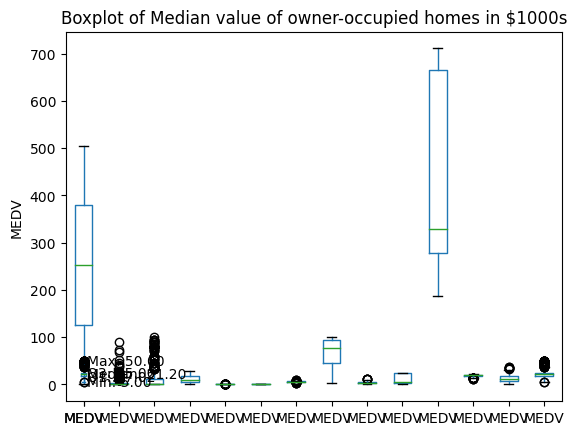

In [218]:
boston_df['MEDV'].plot(kind='box')

five_number_summary = boston_df['MEDV'].describe()[['min', '25%', '50%', '75%', 'max']]

plt.text(1.1, five_number_summary['min'], f"Min: {five_number_summary['min']:.2f}", verticalalignment='center')
plt.text(1.1, five_number_summary['25%'], f"Q1: {five_number_summary['25%']:.2f}", verticalalignment='center')
plt.text(1.1, five_number_summary['50%'], f"Median: {five_number_summary['50%']:.2f}", verticalalignment='center')
plt.text(1.1, five_number_summary['75%'], f"Q3: {five_number_summary['75%']:.2f}", verticalalignment='center')
plt.text(1.1, five_number_summary['max'], f"Max: {five_number_summary['max']:.2f}", verticalalignment='center')

plt.title('Boxplot of Median value of owner-occupied homes in $1000s')
plt.ylabel('MEDV')
plt.show()

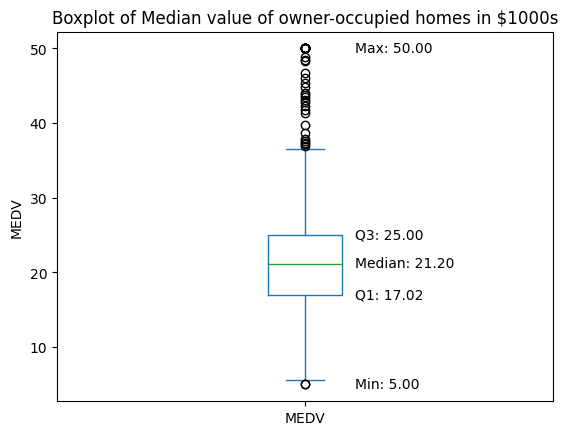

In [219]:
boston_df['MEDV'].plot(kind='box')

five_number_summary = boston_df['MEDV'].describe()[['min', '25%', '50%', '75%', 'max']]

plt.text(1.1, five_number_summary['min'], f"Min: {five_number_summary['min']:.2f}", verticalalignment='center')
plt.text(1.1, five_number_summary['25%'], f"Q1: {five_number_summary['25%']:.2f}", verticalalignment='center')
plt.text(1.1, five_number_summary['50%'], f"Median: {five_number_summary['50%']:.2f}", verticalalignment='center')
plt.text(1.1, five_number_summary['75%'], f"Q3: {five_number_summary['75%']:.2f}", verticalalignment='center')
plt.text(1.1, five_number_summary['max'], f"Max: {five_number_summary['max']:.2f}", verticalalignment='center')

plt.title('Boxplot of Median value of owner-occupied homes in $1000s')
plt.ylabel('MEDV')
plt.show()

<b>Answeer 2a: The middle box represents the middle 50% of values in the dataset
75% of values fall below the upper quartile (Q3):
25% of values falle below the lower quartile (Q1)
The upper and lower whiskers Q4 and Q5 represent the values outside the middle 50%
There are a number of outliers we might want to remove if conducting further analysis on this data

<div class="alert alert-block alert-warning">
<b>Task 2b:</b> Provide a  bar plot for the Charles river variable
</div>

In [220]:
#Find the unique values of CHAS
distinct_values_medv = boston_df['CHAS'].unique()
print(distinct_values_medv)

[0. 1.]


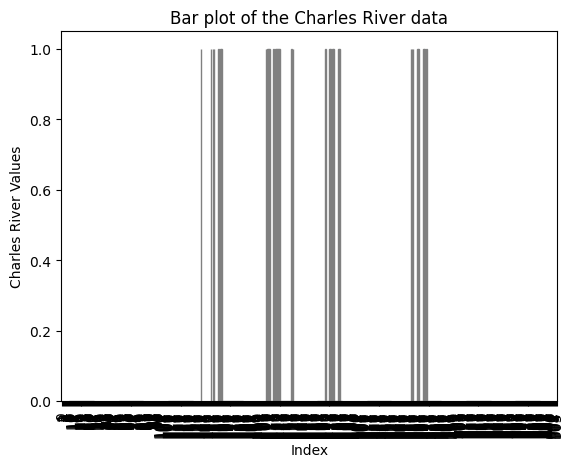

In [221]:
boston_df['CHAS'].plot(kind='bar', color='skyblue', edgecolor='gray')
plt.title('Bar plot of the Charles River data')
plt.xlabel('Index')
plt.ylabel('Charles River Values')

plt.show()


<b> Answer 2a: Given the data values, the chart above provides little information  since the only values are 0 and 1.
This data is better represented below, aggregating the number of instances of zeros and ones to give a total representation of the numbers of instances of each value

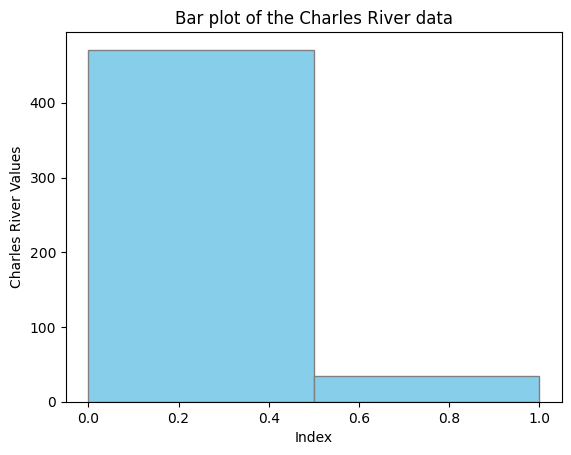

In [223]:
boston_df['CHAS'].plot(kind='hist', bins=2, color='skyblue', edgecolor='gray')
plt.title('Bar plot of the Charles River data')
plt.xlabel('Index')
plt.ylabel('Charles River Values')

plt.show()

<div class="alert alert-block alert-warning">
<b>Task 2c:</b> Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
</div>

In [224]:
#split the columsn I want from the main dataframe, not necessary but keeps it neater for me.

In [225]:
medv_age = boston_df[['AGE', 'MEDV']]
print(medv_age)

      AGE  MEDV
0    65.2  24.0
1    78.9  21.6
2    61.1  34.7
3    45.8  33.4
4    54.2  36.2
..    ...   ...
501  69.1  22.4
502  76.7  20.6
503  91.0  23.9
504  89.3  22.0
505  80.8  11.9

[506 rows x 2 columns]


In [226]:
#Create buckets for the age grouping

In [227]:
medv_age['AgeGroup'] = pd.cut(medv_age['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>=70'])

<ipython-input-227-ed192efbf6bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medv_age['AgeGroup'] = pd.cut(medv_age['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>=70'])


In [228]:
#Show the new dataframe with newly created AgeGroup variable
medv_age

,AGE,MEDV,AgeGroup
0,65.2,24.0,35-70
1,78.9,21.6,>=70
2,61.1,34.7,35-70
3,45.8,33.4,35-70
4,54.2,36.2,35-70
...,...,...,...
501,69.1,22.4,35-70
502,76.7,20.6,>=70
503,91.0,23.9,>=70
504,89.3,22.0,>=70


In [229]:
#Create the boxplot for MEDV grouped by Age Group

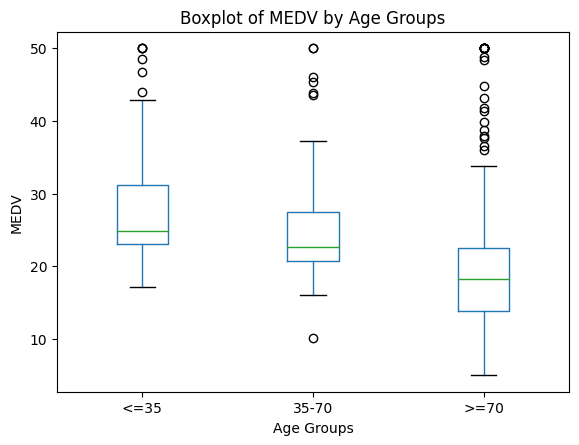

In [230]:
medv_age.boxplot(column='MEDV', by='AgeGroup', grid=False)

plt.title('Boxplot of MEDV by Age Groups')
plt.suptitle('')
plt.xlabel('Age Groups')
plt.ylabel('MEDV')

plt.show()

<b> Answer 2C:  Boxplot is provided above showing the distribution of the quintiles for each of the three age buckets.

<div class="alert alert-block alert-warning">
<b>Task 2d:</b> Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
</div>

In [231]:
dataset_variables

{'AGE - proportion of owner-occupied units built prior to 1940',
 'CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
 'CRIM - per capita crime rate by town',
 'DIS - weighted distances to five Boston employment centres',
 'INDUS - proportion of non-retail business acres per town.',
 'LSTAT - % lower status of the population',
 'MEDV - Median value of owner-occupied homes in $1000s',
 'NOX - nitric oxides concentration (parts per 10 million)',
 'PTRATIO - pupil-teacher ratio by town',
 'RAD - index of accessibility to radial highways',
 'RM - average number of rooms per dwelling',
 'TAX - full-value property-tax rate per $10,000',
 'ZN - proportion of residential land zoned for lots over 25,000 sq.ft.'}

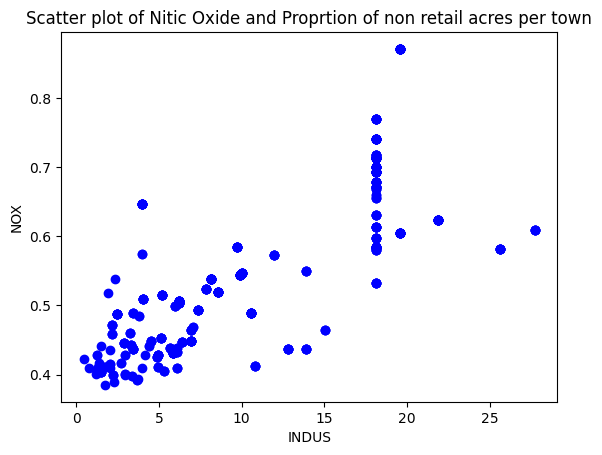

In [232]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'], color='blue')
plt.title('Scatter plot of Nitic Oxide and Proprtion of non retail acres per town')
plt.xlabel('INDUS')
plt.ylabel('NOX')

plt.show()         

<b> Answer 2d: There is a linear relationship showing that the moreindustrialised the greater the Nitrus Oxide levels.  This is evident in the trend in the scatter.

<div class="alert alert-block alert-warning">
<b>Task 2e:</b> Create a histogram for the pupil to teacher ratio variable

</div>

In [234]:
#Find the unique values to get an understanding of how th histogram might look:
boston_df_PTRATIO = boston_df['PTRATIO'].unique()
boston_df_PTRATIO

array([15.3, 17.8, 18.7, 15.2, 21. , 19.2, 18.3, 17.9, 16.8, 21.1, 17.3,
       15.1, 19.7, 18.6, 16.1, 18.9, 19. , 18.5, 18.2, 18. , 20.9, 19.1,
       21.2, 14.7, 16.6, 15.6, 14.4, 12.6, 17. , 16.4, 17.4, 15.9, 13. ,
       17.6, 14.9, 13.6, 16. , 14.8, 18.4, 19.6, 16.9, 20.2, 15.5, 18.8,
       22. , 20.1])

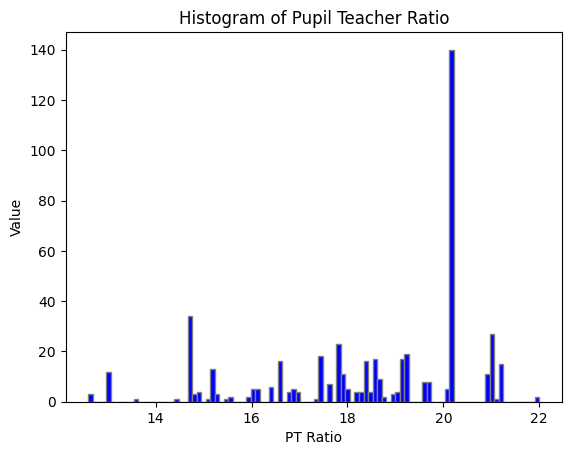

In [235]:
boston_df['PTRATIO'].plot(kind='hist',bins=100,  color='blue', edgecolor='gray')
plt.title('Histogram of Pupil Teacher Ratio')
plt.xlabel('PT Ratio')
plt.ylabel('Value')

plt.show()

<b> Answer 2e: Histogram chart provided above

In [236]:
#Working/Test

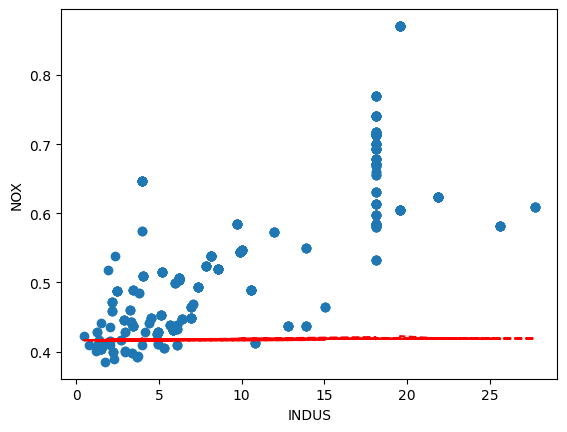

In [237]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'])
plt.xlabel('INDUS')
plt.ylabel('NOX')

z=np.polyfit(boston_df['INDUS'], boston_df['NOX'], 1)
p=np.poly1d(z)
plt.plot(boston_df['INDUS'], p(boston_df['NOX']), "r--")

plt.show()

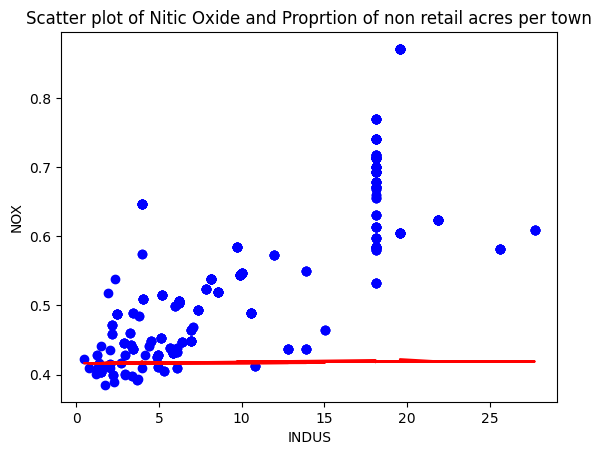

In [238]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'], color='blue')

slope, intercept =np.polyfit(boston_df['INDUS'], boston_df['NOX'], 1)
plt.plot(boston_df['INDUS'], slope * boston_df['NOX'] + intercept, color='red', label ='trend line')

plt.title('Scatter plot of Nitic Oxide and Proprtion of non retail acres per town')
plt.xlabel('INDUS')
plt.ylabel('NOX')

plt.show() 

In [239]:
#boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
#boston_df=pd.read_csv(boston_url)

In [261]:
#https://cf-courses-data.static.labs.skills.network/jupyterlite/2.5.5/lab/index.html?path=labs%2FTemplates%2FOptional_Peer_Graded_Assignment.jupyterlite.ipynb

<div class="alert alert-block alert-info">
<b>Task 3:</b> Use the appropriate tests to answer the questions provided.
</div>
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.
    

<div class="alert alert-block alert-warning">
<b>Task 3a:</b> Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
</div>

In [241]:
#from scipy import stats

In [242]:
#'CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
#Need to filter the dataset where CHAS = 1

In [243]:
#chas_bounded = boston_df[boston_df['CHAS']==1]
#chas_bounded.head(10)

In [244]:
#distinct_chas_bounded=chas_bounded['CHAS'].unique()
#print(distinct_chas_bounded)

In [245]:
#chas_unbounded = boston_df[boston_df['CHAS']==0]
#chas_unbounded.head(10)

In [246]:
#distinct_chas_unbounded=chas_unbounded['CHAS'].unique()
#print(distinct_chas_unbounded)

In [247]:
#Hypothesis is that there is a signifcance correlation between house on the border of the river
#Null Hypothesis is that there is not a significance on the MED value for houses on the border of the river

In [248]:
from scipy import stats

In [249]:
#Run an independent two-sample t-test to check if the means of MEDV values for CHAS = 0 and CHAS = 1 are significantly different.
#separate out the values based on CHAS
group_0 = boston_df[boston_df['CHAS']==0]['MEDV']
group_1 = boston_df[boston_df['CHAS']==1]['MEDV']

#Run the t-test
t_stat, p_value = stats.ttest_ind(group_0, group_1)

print(f"t-stat: {t_stat}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis as the result is significant (there is a correlation in house value and the border of the Charles River")
else:
    print("Don't reject the null hypothesis as the result is not significantly statistically")


t-stat: -3.996437466090509
P-Value: 7.390623170519905e-05
Reject the null hypothesis as the result is significant (there is a correlation in house value and the border of the Charles River


<b>Answer 3a: "Reject the null hypothesis as the result is significant (there is a correlation in house value and the border of the Charles River")

<div class="alert alert-block alert-warning">
<b>Task 3b:</b> Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
</div>

In [250]:
max_age = boston_df['AGE'].max()
print(max_age)

100.0


In [251]:
cnt_age_100 = boston_df[boston_df['AGE'] ==100].shape[0]
cnt_age_not_100 = boston_df[boston_df['AGE'] !=100].shape[0]
print(cnt_age_100)
print(cnt_age_not_100)

43
463


In [252]:
#dataset_variables

In [253]:
medv_age

,AGE,MEDV,AgeGroup
0,65.2,24.0,35-70
1,78.9,21.6,>=70
2,61.1,34.7,35-70
3,45.8,33.4,35-70
4,54.2,36.2,35-70
...,...,...,...
501,69.1,22.4,35-70
502,76.7,20.6,>=70
503,91.0,23.9,>=70
504,89.3,22.0,>=70


In [254]:
#ANOVA test to compare if there is a difference in median value for the age groupings.
group_1 = medv_age[medv_age['AgeGroup'] == '<35']['MEDV']
group_2 = medv_age[medv_age['AgeGroup'] == '35-70']['MEDV']
group_3 = medv_age[medv_age['AgeGroup'] == '>70']['MEDV']

f_stat, p_value = stats.f_oneway(group_1,group_2, group_3)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Result is less than 0.05 so statistically significant")
else:
    print("Result is greater than 0.05 so not statistically significant")

<ipython-input-254-6f9b9de3c573>:6: DegenerateDataWarning: at least one input has length 0
  f_stat, p_value = stats.f_oneway(group_1,group_2, group_3)


F-statistic: nan
P-value: nan
Result is greater than 0.05 so not statistically significant


In [255]:
#Further tests to compare each age group separately (pairwise)
t_stat_1, p_value_1 = stats.ttest_ind(group_1, group_2)
print(f"t-test between <35 and 35-70: t-statistic = {t_stat_1}, p-value= {p_value_1}")

t_stat_2, p_value_2 = stats.ttest_ind(group_1, group_3)
print(f"t-test between 35-70 and >70: t-statistic = {t_stat_2}, p-value= {p_value_2}")

t_stat_3, p_value_3 = stats.ttest_ind(group_2, group_3)
print(f"t-test between <35 and >70: t-statistic = {t_stat_3}, p-value= {p_value_3}")

if p_value_1 < alpha:
    print("significant difference between <35 and 35-70")
else:
    print("No significant difference between <35 and 35-70")

if p_value_2 < alpha:
    print("Signifiant difference between <35 and >70")
else:
    print("No significante difference between <35 and 70")

if p_value_3 < alpha:
    print("significant difference between 35-70 and >70")
else:
    print("No significant difference between 35-70 and >70")

t-test between <35 and 35-70: t-statistic = nan, p-value= nan
t-test between 35-70 and >70: t-statistic = nan, p-value= nan
t-test between <35 and >70: t-statistic = nan, p-value= nan
No significant difference between <35 and 35-70
No significante difference between <35 and 70
No significant difference between 35-70 and >70


<b>
3b Answer: There is no significant difference between any of the agr groups on the median value MEDV of houses

<div class="alert alert-block alert-warning">
<b>Task 3c:</b> Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
</div>

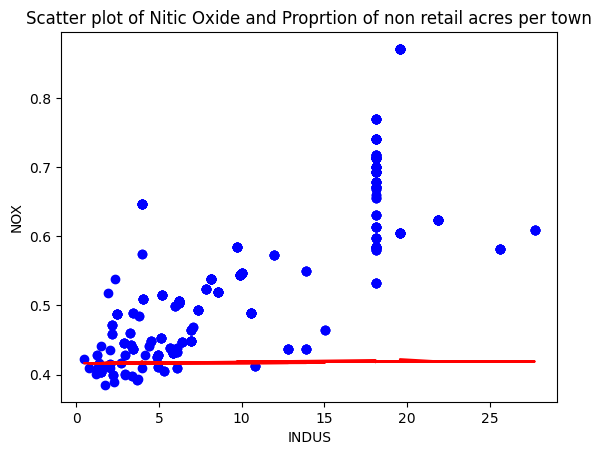

In [256]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'], color='blue')

slope, intercept =np.polyfit(boston_df['INDUS'], boston_df['NOX'], 1)
plt.plot(boston_df['INDUS'], slope * boston_df['NOX'] + intercept, color='red', label ='trend line')

plt.title('Scatter plot of Nitic Oxide and Proprtion of non retail acres per town')
plt.xlabel('INDUS')
plt.ylabel('NOX')

plt.show() 

<div class="alert alert-block alert-warning">
<b>Task 3d:</b> What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
</div>

In [257]:
#using Linear regression 

x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        20:07:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<b>
3d Answer: The result shows a positive coefficient for DIS (1.09) which indicates that as the distance increases from the business centre the MEDV increases.
if there was a negative coefficiebt for DIS then the MEDV value decreases 